In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
# import the data

data=pd.read_csv(r"C:\Users\nimma\Downloads\Student_Satisfaction_Survey.csv",encoding_errors='ignore')

In [160]:
data.head(10)

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be ...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
5,6,1,12,Was your performance in assignments discussed ...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
6,7,1,12,The institute takes an active interest in prom...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
7,8,1,12,The teaching and mentoring process in your ins...,0,1,0,0,0,2.00 / 40.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
8,9,1,12,The institution provides multiple opportunitie...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
9,10,1,12,Teachers inform you about your expected compet...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SN                    580 non-null    int64 
 1   Total Feedback Given  580 non-null    int64 
 2   Total Configured      580 non-null    int64 
 3   Questions             580 non-null    object
 4   Weightage 1           580 non-null    int64 
 5   Weightage 2           580 non-null    int64 
 6   Weightage 3           580 non-null    int64 
 7   Weightage 4           580 non-null    int64 
 8   Weightage 5           580 non-null    int64 
 9   Average/ Percentage   580 non-null    object
 10  Course Name           580 non-null    object
 11  Basic Course          580 non-null    object
dtypes: int64(8), object(4)
memory usage: 54.5+ KB


In [162]:
data.isnull().sum()

SN                      0
Total Feedback Given    0
Total Configured        0
Questions               0
Weightage 1             0
Weightage 2             0
Weightage 3             0
Weightage 4             0
Weightage 5             0
Average/ Percentage     0
Course Name             0
Basic Course            0
dtype: int64

In [163]:
data[['Average','Percentage']]=data['Average/ Percentage'].str.split('/ ',expand=True)
data['Average']=pd.to_numeric(data['Average'].str.strip())
data['percentage']=pd.to_numeric(data['Percentage'].str.strip())

In [164]:
data=data.drop('Average/ Percentage',axis=1)
data=data.drop('Percentage',axis=1)

In [165]:
data.columns

Index(['SN', 'Total Feedback Given', 'Total Configured', 'Questions',
       'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4',
       'Weightage 5', 'Course Name ', 'Basic Course', 'Average', 'percentage'],
      dtype='object')

In [166]:
data['Average']=data['Average'].astype(float)

In [167]:
data.head()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Course Name,Basic Course,Average,percentage
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,3.0,60.0
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,5.0,100.0
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,5.0,100.0
3,4,1,12,The teachers approach to teaching can best be ...,0,0,1,0,0,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,3.0,60.0
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,4.0,80.0


In [168]:
# Renaming columns according to snake casing for better readability and documentation

data.columns=data.columns.str.lower()
data.columns=data.columns.str.replace(' ','_')

In [169]:
data.head()

,sn,total_feedback_given,total_configured,questions,weightage_1,weightage_2,weightage_3,weightage_4,weightage_5,course_name_,basic_course,average,percentage
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,3.0,60.0
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,5.0,100.0
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,5.0,100.0
3,4,1,12,The teachers approach to teaching can best be ...,0,0,1,0,0,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,3.0,60.0
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,4.0,80.0


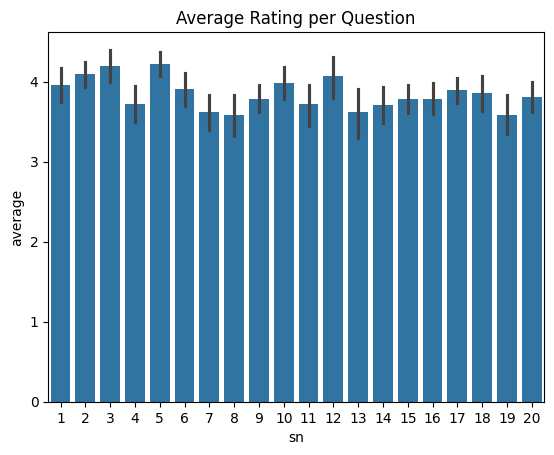

In [170]:
sns.barplot(x='sn',y='average',data=data)
plt.title('Average Rating per Question')
plt.show()

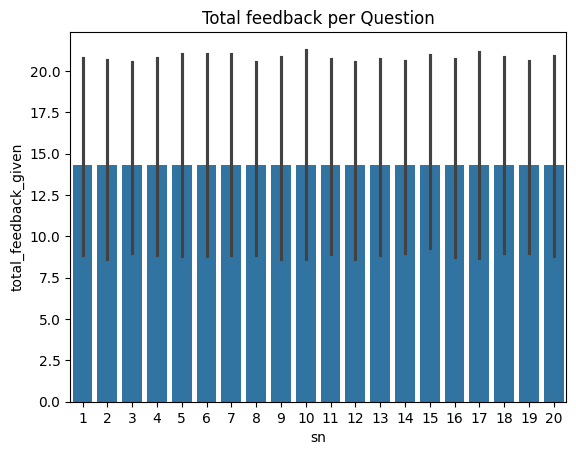

In [171]:
sns.barplot(x='sn',y='total_feedback_given',data=data)
plt.title('Total feedback per Question')
plt.show()

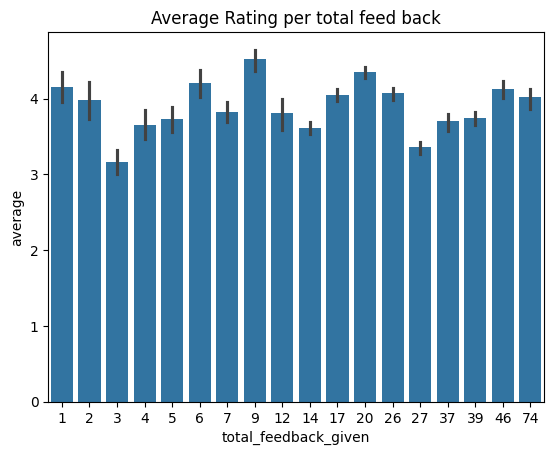

In [172]:
sns.barplot(x='total_feedback_given',y='average',data=data)
plt.title('Average Rating per total feed back')
plt.show()

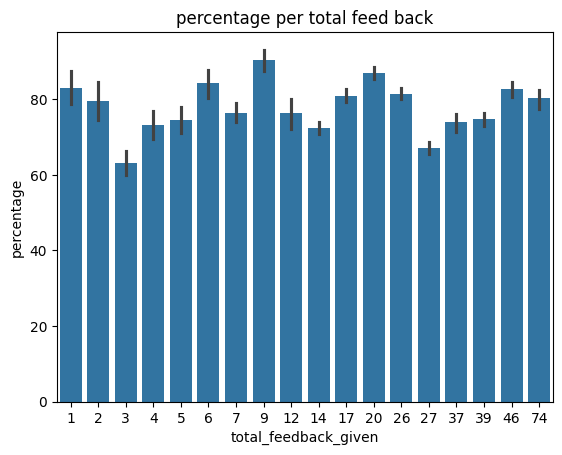

In [173]:
sns.barplot(x='total_feedback_given',y='percentage',data=data)
plt.title('percentage per total feed back')
plt.show()

Text(0.5, 1.0, 'Distribution of Weightages')

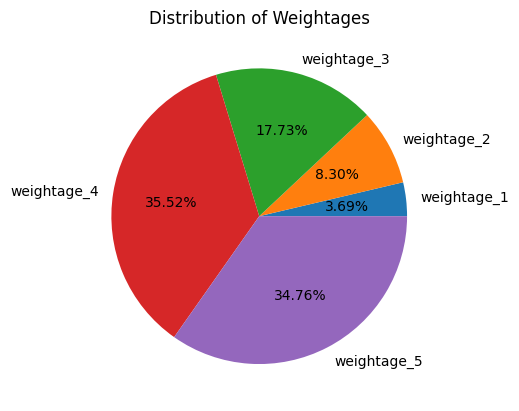

In [174]:
weights=data[['weightage_1','weightage_2','weightage_3','weightage_4','weightage_5']].sum()
plt.pie(weights,labels=weights.index,autopct='%1.2f%%')
plt.title('Distribution of Weightages')

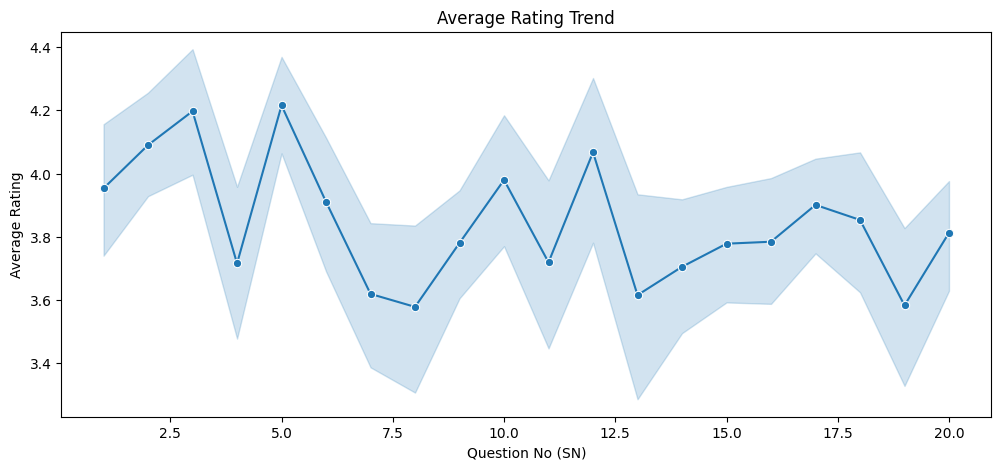

In [175]:
plt.figure(figsize=(12,5))
sns.lineplot(x=data['sn'], y=data['average'], marker='o')
plt.title("Average Rating Trend")
plt.xlabel("Question No (SN)")
plt.ylabel("Average Rating")
plt.show()

Text(0.5, 1.0, 'percentage  per Question')

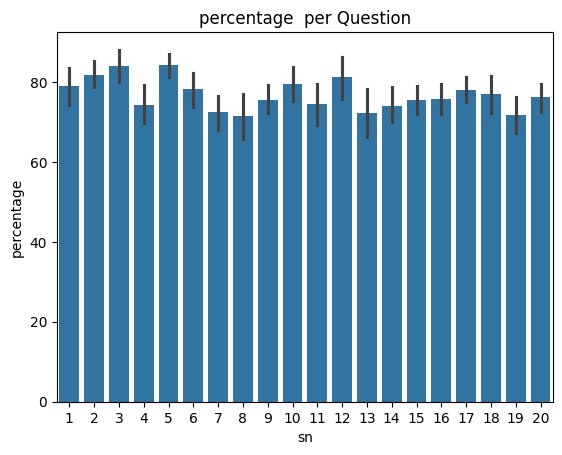

In [176]:
sns.barplot(x='sn',y='percentage',data=data)
plt.title('percentage  per Question')

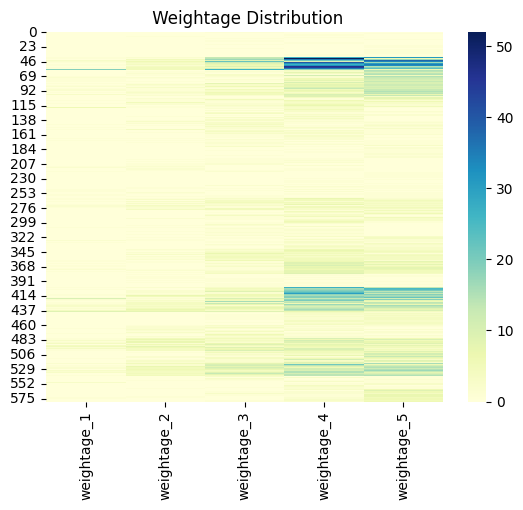

In [177]:
sns.heatmap(data[['weightage_1','weightage_2','weightage_3','weightage_4','weightage_5']],cmap='YlGnBu',annot=False)
plt.title(" Weightage Distribution")
plt.show()

Text(0.5, 1.0, 'weightages')

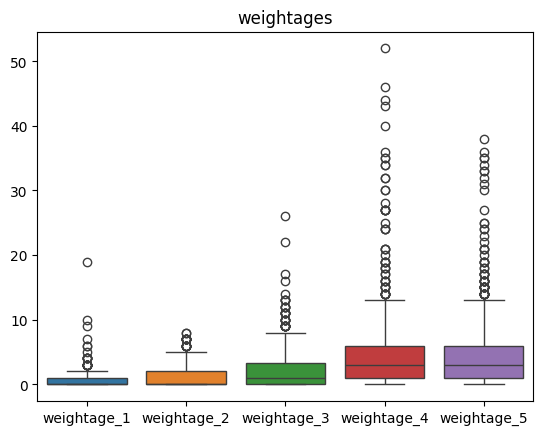

In [178]:
sns.boxplot(data[['weightage_1','weightage_2','weightage_3','weightage_4','weightage_5']])
plt.title('weightages')

Text(0.5, 1.0, 'count of weightages value')

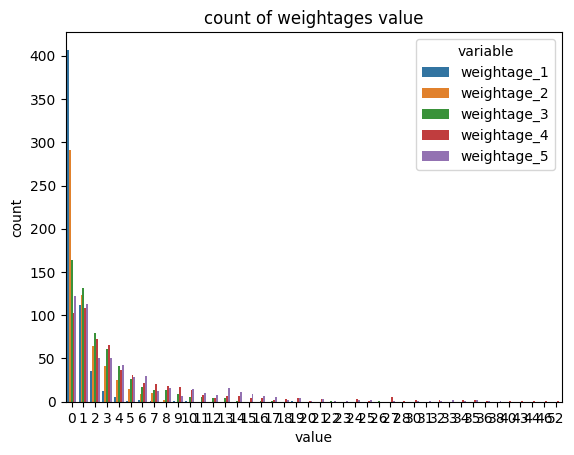

In [179]:
sns.countplot(data[['weightage_1','weightage_2','weightage_3','weightage_4','weightage_5']].melt(),
              x='value', hue='variable')
plt.title('count of weightages value')

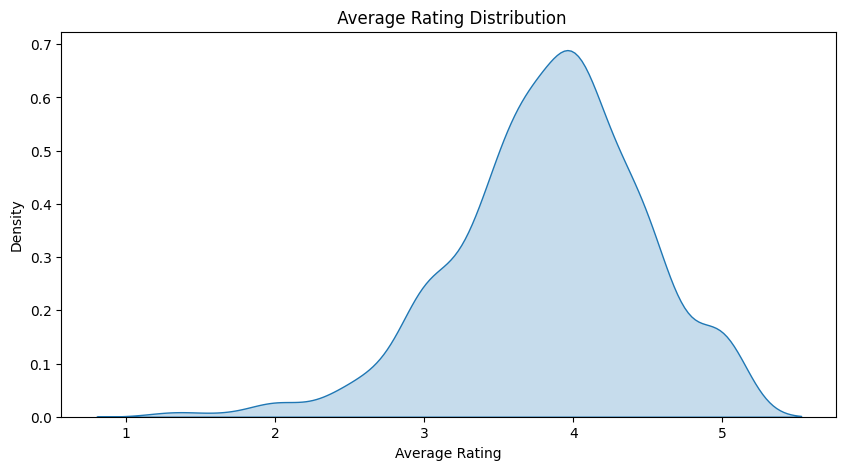

In [180]:
plt.figure(figsize=(10,5))
sns.kdeplot(data['average'], fill=True)
plt.title(" Average Rating Distribution")
plt.xlabel("Average Rating")
plt.ylabel("Density")
plt.show()

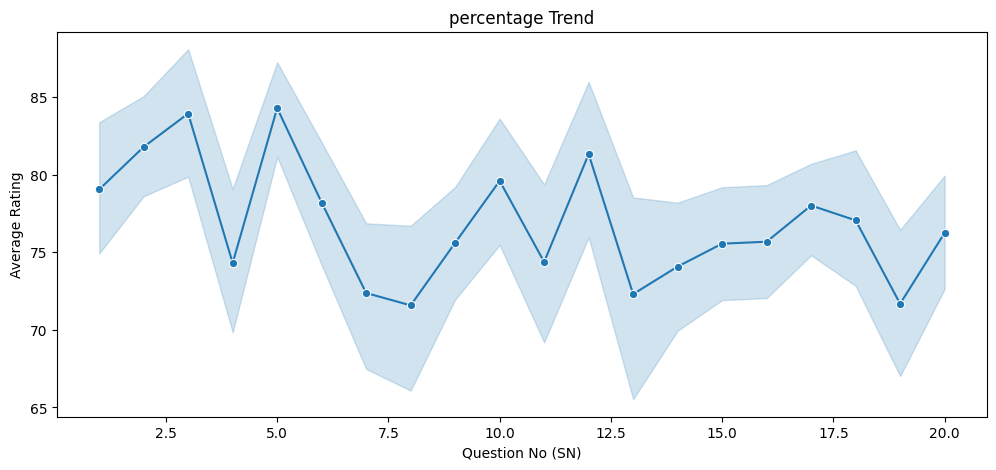

In [181]:
plt.figure(figsize=(12,5))
sns.lineplot(x=data['sn'], y=data['percentage'], marker='o')
plt.title("percentage Trend")
plt.xlabel("Question No (SN)")
plt.ylabel("Average Rating")
plt.show()

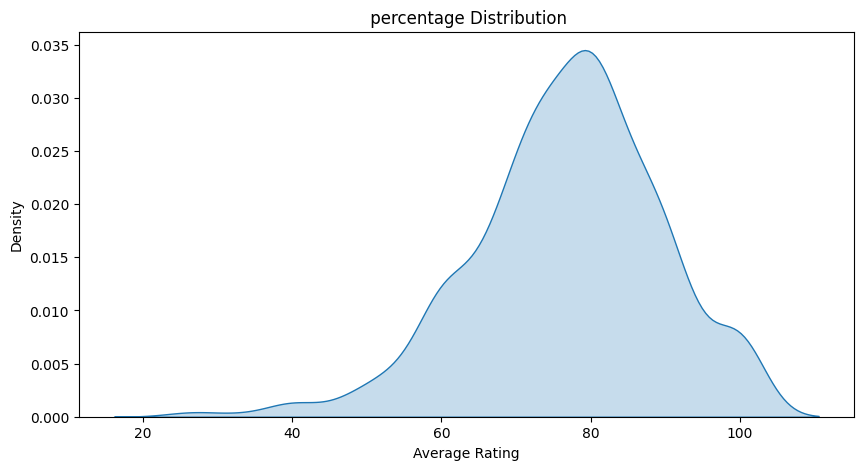

In [182]:
plt.figure(figsize=(10,5))
sns.kdeplot(data['percentage'], fill=True)
plt.title(" percentage Distribution")
plt.xlabel("Average Rating")
plt.ylabel("Density")
plt.show()